In [128]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D
import pandas as pd

def leer_datos_csv(archivo, n_filas):
    # Leer el archivo CSV con pandas
    datos = pd.read_csv(archivo)

    # Seleccionar índices aleatorios
    indices_aleatorios = np.random.choice(datos.index, size=n_filas, replace=False)

    # Seleccionar las filas correspondientes a los índices aleatorios
    datos_aleatorios = datos.loc[indices_aleatorios]

    # Seleccionar las columnas con los nombres "peso" y "estatura"
    X = datos_aleatorios['Radio']
    Y = datos_aleatorios['Sales']

    # Convertir los valores a números flotantes
    X = X.astype(float)
    Y = Y.astype(float)

    return X, Y

def leer_datos_archivo(archivo):
    # Lee un archivo de texto .txt que contiene un conjunto de datos separados por comas
    # y devuelve dos arrays numpy con los valores de X e Y.
    datos = []
    with open(archivo, 'r') as f:
        for linea in f:
            valores = linea.strip().split(',')
            datos.append([float(val) for val in valores])

    datos = np.array(datos)
    X = datos[:, 0]
    Y = datos[:, 1]

    return X, Y

def graficar_puntos(X, Y):
    #Grafica los puntos en un plano cartesiano
    plt.scatter(X, Y, alpha=0.3)
    plt.xlabel('X - Gasto en TV')
    plt.ylabel('Y - Beneficio en Ventas')
    plt.title('Puntos en el plano cartesiano')
    plt.show()

def graficar_puntos_ecuacion(X, Y):
    # Calcula la línea de ajuste (regresión lineal)
    m, b = np.polyfit(X, Y, 1)
    Y_pred = m * X + b

    # Grafica los puntos en un plano cartesiano
    plt.scatter(X, Y, alpha=0.3, label='Datos de Entrenamiento')

    # Grafica la línea de ajuste
    plt.plot(X, Y_pred, color='red', label='Línea de ajuste - Regresion Lineal')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Puntos en el plano cartesiano con línea de ajuste')
    plt.legend()
    plt.show()

def computeCost(X, Y, theta):
    # inicializa algunos valores importantes
    # m = y.size: Esta línea obtiene el número de ejemplos de entrenamiento en el conjunto de datos.
    # En otras palabras, m es el número de filas en la matriz y.
    m = Y.size
    # J = 0: Inicializa la variable J en cero. Esta variable almacenará el costo o la función de pérdida.
    J = 0
    # h = np.dot(X, theta): Esta línea calcula la predicción h utilizando la ecuación de la regresión lineal.
    # La ecuación es h = X * theta, donde X es la matriz de características (variables independientes).
    # theta es el vector de parámetros que se ajustan durante el entrenamiento.
    h = np.dot(X, theta)

    # J es la costo o la funcion de perdida o error.
    # J = (1/2m) * Σ(h - y)^2
    # Donde:
    # h es la predicción calculada en la línea anterior.
    # y es el valor real.
    # m es el número de ejemplos de entrenamiento.
    # Σ es la suma de todos los términos.

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - Y))

    return J

def gradientDescent(X, y, theta, alpha, num_iters):
    # Inicializa algunos valores importantes.
    # Numero de ejemplos de entrenamiento.
    m = y.shape[0]

    # Hace una copia de theta, para evitar cambiar la matriz original,
    # ya que las matrices numpy se pasan por referencia a las funciones
    theta = theta.copy()

    # Lista que se utiliza para almacenar el costo en cada iteración.
    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)

        # Save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))

        #print('Tetha encontrada en la iteracion {:.4f}, {:.4f}'.format(*theta))
        #pyplot.clf()  # borra la figura actual
        #plotData(X[:, 1], y)
        #pyplot.plot(X[:, 1], np.dot(X, theta), '-')
        #pyplot.legend(['Datos de entrenamiento', 'Regresión linear'])
        #pyplot.pause(0.5)  # pausa por 0.5 segundos
        #print("theta: ",theta)

    return theta, J_history

In [129]:
# Ejemplo de uso
#archivo = 'ex1data1.txt'
archivo = 'Dummy Data HSS.csv'
X, Y = leer_datos_csv(archivo,400)
m=Y.size

print("===================================================================================")
print("Numero de datos para entrenamiento: ",m)
print("===================================================================================")
print("Valores de X:", X)
print("===================================================================================")
print("Valores de Y:", Y)
print("===================================================================================")

Numero de datos para entrenamiento:  400
Valores de X: 2522    27.638603
1982    16.935831
3135    29.340186
1459    30.299460
3285    32.668740
          ...    
4558     6.240950
1009     9.848338
2021    11.811853
371      8.822605
2182    18.240984
Name: Radio, Length: 400, dtype: float64
Valores de Y: 2522    251.979830
1982    200.269233
3135    284.260350
1459    328.349175
3285    269.031401
           ...    
4558     41.710366
1009     36.574907
2021    256.660799
371      86.786026
2182    234.596018
Name: Sales, Length: 400, dtype: float64


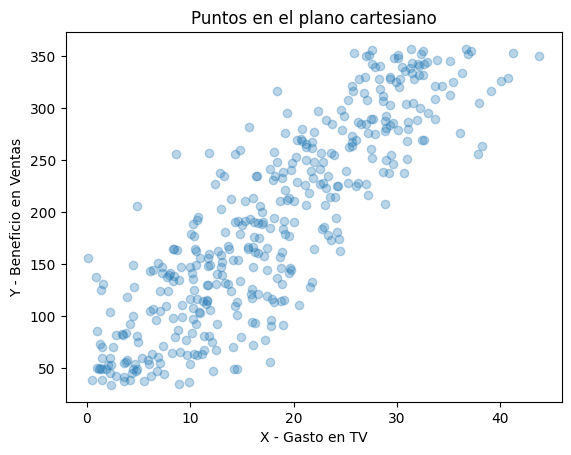

In [130]:
graficar_puntos(X, Y)

In [131]:
# Agrega una columna de unos a X. La funcion stack de numpy une matrices a lo largo de un eje dado.
# El primer eje (eje = 0) se refiere a filas (ejemplos de entrenamiento)
# y el segundo eje (eje = 1) se refiere a columnas (características).
X = np.stack([np.ones(m), X], axis=1)

J = computeCost(X, Y, theta=np.array([0.0, 0.0]))
print('Con theta = [0, 0] \n Costo calculado = %.2f\n' %J)

# pruebas adicionales de la función de costes
J = computeCost(X, Y, theta=np.array([-1, 2]))
print('Con theta = [-1, 2]\n Costo calculado = %.2f' % J)

Con theta = [0, 0] 
 Costo calculado = 22360.19

Con theta = [-1, 2]
 Costo calculado = 14979.83


In [132]:
# Inicializamos los parametros de ajuste.
theta = np.zeros(2)

# Configuraciones para el descenso por el gradiente.
iterations = 50
alpha = 0.003

theta, J_history = gradientDescent(X ,Y, theta, alpha, iterations)
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
print('Valores theta esperados (aproximadamente): [-3.6303, 1.1664]')

Theta encontrada por descenso gradiente: 1.8262, 9.9841
Valores theta esperados (aproximadamente): [-3.6303, 1.1664]


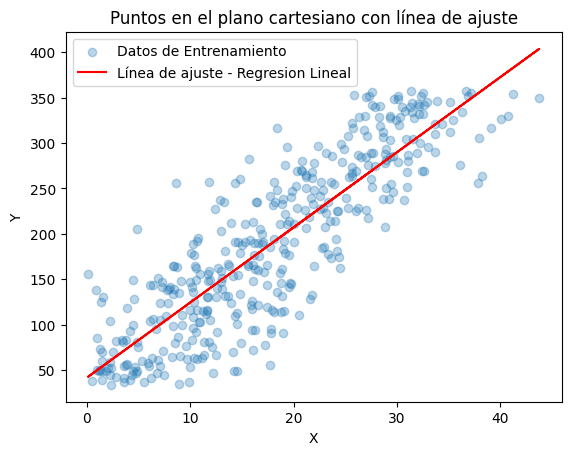

In [133]:
# grafica la linea de ajuste
graficar_puntos_ecuacion(X[:, 1], Y)

In [142]:
# Predecir valores de ventas para marketin en TV.
predict1 = np.dot([1, 3.5], theta)
print('Para gasto en TV = 60.000.000 (millones), se predice un beneficio de {:.2f}\n'.format(predict1*10000000))
print('Beneficio esperado: 210.000.000')
predict2 = np.dot([1, 2.6], theta)
print('Para gasto en TV = 26.000.000 (millones), se predice un beneficio de {:.2f}\n'.format(predict2*10000000))
print('Beneficio esperado: 91.000.000')

Para gasto en TV = 60.000.000 (millones), se predice un beneficio de 367706034.79

Beneficio esperado: 210.000.000
Para gasto en TV = 26.000.000 (millones), se predice un beneficio de 277849086.47

Beneficio esperado: 91.000.000


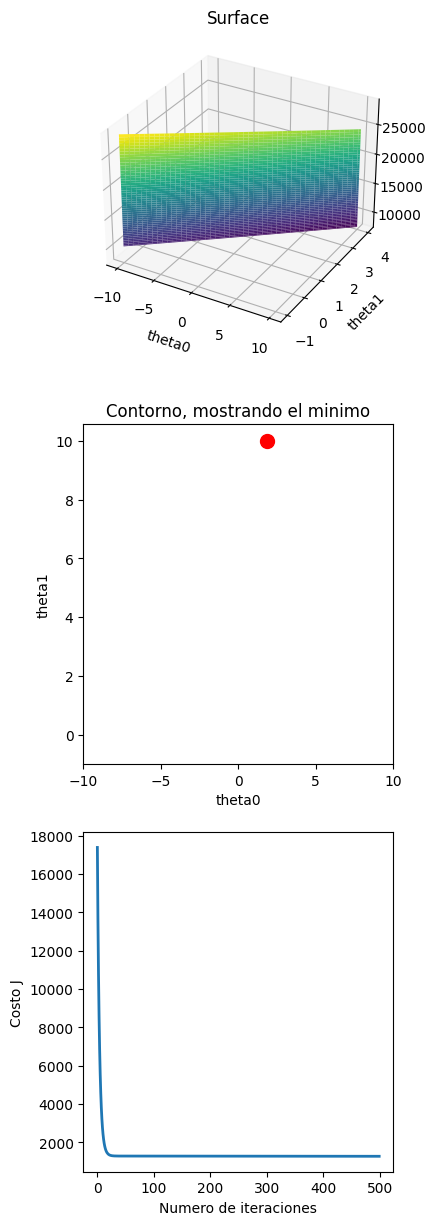

In [97]:
# cuadrícula sobre la que se calcula J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# inicializa J_vals con una matriz de 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Completar J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, Y, [theta0, theta1])

# Debido a la forma en que funcionan las cuadrículas en el comando surf,
# se necesita transponer J_vals antes de llamar a surf, o de lo contrario los ejes se invertirán
J_vals = J_vals.T

# graficar la superficie
fig = plt.figure(figsize=(4, 15))
ax = fig.add_subplot(311, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Surface')

# graficar contornos
# Grafica J_vals como 15 contours spaciados logaritmicamente entre 0.01 y 100
ax = plt.subplot(312)
plt.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
plt.title('Contorno, mostrando el minimo')


# Grafica la convergencia del costo
ax = plt.subplot(313)
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo J')

pass